In [1]:
pip install opencv-python-headless numpy


Vertical Symmetry Percentage: 99.58%
Horizontal Symmetry Percentage: 93.38%
Rotational Symmetry Percentage: 93.38%


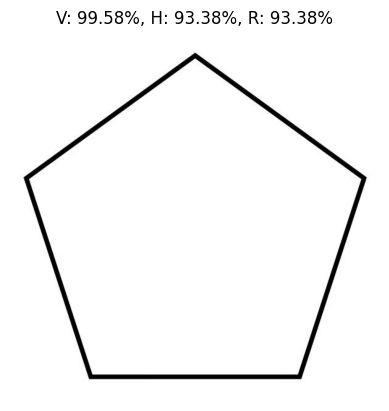

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_vertical_symmetry(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height, width = gray_image.shape

    left_half = gray_image[:, :width//2]
    right_half = gray_image[:, width//2:]

    # Ensuring the right half matches the left half in width
    if width % 2 != 0:
        right_half = right_half[:, 1:]

    flipped_right_half = cv2.flip(right_half, 1)

    difference = cv2.absdiff(left_half, flipped_right_half)

    symmetry_score = np.sum(difference)

    max_score = width // 2 * height * 255
    symmetry_percentage = 100 * (1 - (symmetry_score / max_score))

    return symmetry_percentage

def detect_horizontal_symmetry(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height, width = gray_image.shape

    top_half = gray_image[:height//2, :]
    bottom_half = gray_image[height//2:, :]

    # Ensuring the bottom half matches the top half in height
    if height % 2 != 0:
        bottom_half = bottom_half[1:, :]

    flipped_bottom_half = cv2.flip(bottom_half, 0)

    difference = cv2.absdiff(top_half, flipped_bottom_half)

    symmetry_score = np.sum(difference)

    max_score = width * height // 2 * 255
    symmetry_percentage = 100 * (1 - (symmetry_score / max_score))

    return symmetry_percentage

def detect_rotational_symmetry(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    rotated_image = cv2.rotate(gray_image, cv2.ROTATE_180)

    difference = cv2.absdiff(gray_image, rotated_image)

    symmetry_score = np.sum(difference)

    max_score = gray_image.size * 255
    symmetry_percentage = 100 * (1 - (symmetry_score / max_score))

    return symmetry_percentage

def upload_image_and_detect_symmetry(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    vertical_symmetry = detect_vertical_symmetry(image)
    horizontal_symmetry = detect_horizontal_symmetry(image)
    rotational_symmetry = detect_rotational_symmetry(image)

    print(f"Vertical Symmetry Percentage: {vertical_symmetry:.2f}%")
    print(f"Horizontal Symmetry Percentage: {horizontal_symmetry:.2f}%")
    print(f"Rotational Symmetry Percentage: {rotational_symmetry:.2f}%")

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"V: {vertical_symmetry:.2f}%, H: {horizontal_symmetry:.2f}%, R: {rotational_symmetry:.2f}%")
    plt.axis('off')
    plt.show()


image_path = '/content/pentagon.jpeg.jpg'
upload_image_and_detect_symmetry(image_path)
